In [1]:
import pandas as pd
import sqlite3
import sqlalchemy 
import dataframe_image as dfi
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pip install dataframe_image

In [2]:
try:
    conn = sqlite3.connect("case_study.db")    
except Error as e:
    print(e)

In [3]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")

Table Name : [('open_item_list',), ('payment_list_of_customers',)]


In [4]:
df_1 = pd.read_sql_query('SELECT * FROM open_item_list', conn)

In [5]:
df_2 = pd.read_sql_query('SELECT * FROM payment_list_of_customers', conn)

In [6]:
conn.close()

In [7]:
df_1

,index,Cutomer number,Customer name,Country,Invoice number,Invoice date,Invoice amount \n(incl. VAT if applicable),Open amount\n(incl. VAT if applicable),Due date,Days overdue \nby 2021-10-31
0,0,1071535,AB Ltd.,FR,10142,2021-04-30 00:00:00.000000,5221.13,5221.13,2021-05-30 00:00:00.000000,154
1,1,1071535,AB Ltd.,FR,10146,2021-04-30 00:00:00.000000,12771.68,12771.68,2021-05-30 00:00:00.000000,154
2,2,1071535,AB Ltd.,FR,10180,2021-06-30 00:00:00.000000,17028.90,17028.90,2021-08-14 00:00:00.000000,78
3,3,1071535,AB Ltd.,FR,10007,2021-09-08 00:00:00.000000,7470.23,7470.23,2021-10-08 00:00:00.000000,23
4,4,1071535,AB Ltd.,FR,10014,2021-09-30 00:00:00.000000,3775.28,3775.28,2021-11-09 00:00:00.000000,-9
...,...,...,...,...,...,...,...,...,...,...
92,92,1066009,ZA SE,DE,20577,2021-06-30 00:00:00.000000,13291.28,13291.28,2021-08-29 00:00:00.000000,63
93,93,1066009,ZA SE,DE,20578,2021-06-30 00:00:00.000000,177310.00,177310.00,2021-08-29 00:00:00.000000,63
94,94,1066009,ZA SE,DE,20000,2021-07-20 00:00:00.000000,6220.50,6220.50,2021-09-18 00:00:00.000000,43
95,95,1066009,ZA SE,DE,20001,2021-07-22 00:00:00.000000,59046.31,59046.31,2021-09-20 00:00:00.000000,41


In [8]:
df_cust_inv_amt = df_1[['Customer name','Invoice amount \n(incl. VAT if applicable)']]


In [9]:
df_cust_inv_amt

,Customer name,Invoice amount \n(incl. VAT if applicable)
0,AB Ltd.,5221.13
1,AB Ltd.,12771.68
2,AB Ltd.,17028.90
3,AB Ltd.,7470.23
4,AB Ltd.,3775.28
...,...,...
92,ZA SE,13291.28
93,ZA SE,177310.00
94,ZA SE,6220.50
95,ZA SE,59046.31


In [10]:
df_cust_inv_amt = df_cust_inv_amt.groupby(by=["Customer name"]).sum()

In [11]:
df_cust_inv_amt

,Invoice amount \n(incl. VAT if applicable)
Customer name,
AB Ltd.,86510.06
AN Ltd.,57006.36
BDS GmbH,157761.29
BG GmbH,40555.79
BI GmbH,13387.50
BICC Gm,29845.76
CDSG,5334.18
D AG & Co. KGaA,16362.50
DIHCFP AG,12025.71


In [12]:
df_cust_inv_amt['Customer'] = df_cust_inv_amt.index

In [13]:
df_cust_inv_amt

,Invoice amount \n(incl. VAT if applicable),Customer
Customer name,,
AB Ltd.,86510.06,AB Ltd.
AN Ltd.,57006.36,AN Ltd.
BDS GmbH,157761.29,BDS GmbH
BG GmbH,40555.79,BG GmbH
BI GmbH,13387.50,BI GmbH
BICC Gm,29845.76,BICC Gm
CDSG,5334.18,CDSG
D AG & Co. KGaA,16362.50,D AG & Co. KGaA
DIHCFP AG,12025.71,DIHCFP AG


In [14]:
df_cust_inv_amt_styled = df_cust_inv_amt.style.background_gradient()

In [15]:
#dfi.export(df_cust_inv_amt,"table1.png")

In [16]:
df_2.head()

,index,Customer No.,Country,Customer,Revenues (net w/o VAT),"Discount (0,05%)",Paid within 10 Days,Paid 11-30 Days,Paid 31-60Days,Paid 61-90 Days,Paid 90+ Days,Total amount
0,0,1065842,GB,EDT Stock Corporation,223.698492,1.118492,222.58,NaN,NaN,NaN,NaN,222.58
1,1,1067085,DE,DIHCFP AG,484.250000,NaN,NaN,484.25,NaN,NaN,NaN,484.25
2,2,1065758,DE,RMS GmbH & C,543.500000,NaN,NaN,543.50,NaN,NaN,NaN,543.50
3,3,1028331,CN,E Stock Corporation,544.980000,NaN,NaN,544.98,NaN,NaN,NaN,544.98
4,4,1050019,DE,FS GmbH,548.640000,NaN,NaN,548.64,NaN,NaN,NaN,548.64


In [17]:
DE_Cust = df_2.loc[(df_2["Country"] == "DE")]
DE_Cust = DE_Cust.fillna(0)

In [18]:
DE_Cust_styled = DE_Cust.style.background_gradient()


In [19]:
DE_Cust

,index,Customer No.,Country,Customer,Revenues (net w/o VAT),"Discount (0,05%)",Paid within 10 Days,Paid 11-30 Days,Paid 31-60Days,Paid 61-90 Days,Paid 90+ Days,Total amount
1,1,1067085,DE,DIHCFP AG,484.250000,0.000000,0.000,484.250,0.00,0.0,0.0,484.25
2,2,1065758,DE,RMS GmbH & C,543.500000,0.000000,0.000,543.500,0.00,0.0,0.0,543.50
4,4,1050019,DE,FS GmbH,548.640000,0.000000,0.000,548.640,0.00,0.0,0.0,548.64
5,5,1028420,DE,D AG & Co. KGaA,558.240000,0.000000,0.000,558.240,0.00,0.0,0.0,558.24
6,6,1067562,DE,EDN GmbH,559.560000,0.000000,0.000,559.560,0.00,0.0,0.0,559.56
13,13,1071201,DE,EM Energie AG,1456.840000,0.000000,0.000,0.000,1456.84,0.0,0.0,1456.84
14,14,1064951,DE,TSO GmbH,1564.360000,0.000000,0.000,1564.360,0.00,0.0,0.0,1564.36
16,16,1066910,DE,UIT GmbH,2554.552764,12.772764,2541.780,0.000,0.00,0.0,0.0,2541.78
17,17,1069004,DE,HF Europe GmbH,2567.839196,12.839196,2555.000,0.000,0.00,0.0,0.0,2555.00
18,18,1067353,DE,FT GmbH Eisfeld,2576.884422,12.884422,2564.000,0.000,0.00,0.0,0.0,2564.00


In [264]:
DE_cust_styled = DE_Cust.style.background_gradient()
DE_cust_styled

,index,Customer No.,Country,Customer,Revenues (net w/o VAT),"Discount (0,05%)",Paid within 10 Days,Paid 11-30 Days,Paid 31-60Days,Paid 61-90 Days,Paid 90+ Days,Total amount
1,1,1067085,DE,DIHCFP AG,484.250000,0.000000,0.000000,484.250000,0.000000,0.000000,0.000000,484.250000
2,2,1065758,DE,RMS GmbH & C,543.500000,0.000000,0.000000,543.500000,0.000000,0.000000,0.000000,543.500000
4,4,1050019,DE,FS GmbH,548.640000,0.000000,0.000000,548.640000,0.000000,0.000000,0.000000,548.640000
5,5,1028420,DE,D AG & Co. KGaA,558.240000,0.000000,0.000000,558.240000,0.000000,0.000000,0.000000,558.240000
6,6,1067562,DE,EDN GmbH,559.560000,0.000000,0.000000,559.560000,0.000000,0.000000,0.000000,559.560000
13,13,1071201,DE,EM Energie AG,1456.840000,0.000000,0.000000,0.000000,1456.840000,0.000000,0.000000,1456.840000
14,14,1064951,DE,TSO GmbH,1564.360000,0.000000,0.000000,1564.360000,0.000000,0.000000,0.000000,1564.360000
16,16,1066910,DE,UIT GmbH,2554.552764,12.772764,2541.780000,0.000000,0.000000,0.000000,0.000000,2541.780000
17,17,1069004,DE,HF Europe GmbH,2567.839196,12.839196,2555.000000,0.000000,0.000000,0.000000,0.000000,2555.000000
18,18,1067353,DE,FT GmbH Eisfeld,2576.884422,12.884422,2564.000000,0.000000,0.000000,0.000000,0.000000,2564.000000


In [20]:
#dfi.export(DE_Cust,"DE_Cust.png")

In [21]:
#DE_Cust.to_excel("DE_Cust_data.xlsx")

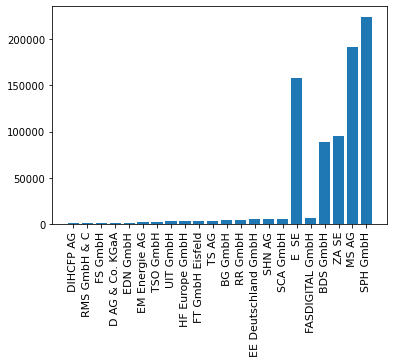

In [210]:
# Total Amount - German Companies 

height = DE_Cust['Total amount']
bars = DE_Cust['Customer']

y_pos = np.arange(len(bars))
y_pos
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.tick_params(axis='x', which='major', labelsize=11)
plt.xticks(rotation=90)

# Show graphic
plt.show()

In [23]:
df_2 = df_2.fillna(0)

In [25]:
df_2.columns = (df_2.columns.str.strip()
              .str.replace(' ', '_')
              .str.replace('+', 'Plus'))

<ipython-input-25-b2c98e932549>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2.columns = (df_2.columns.str.strip()


In [27]:
Aging_list = df_2[['Customer','Total_amount', 
                   'Paid_within_10_Days','Paid_11-30_Days',
                   'Paid_31-60Days','Paid_61-90_Days','Paid_90Plus_Days'
                   ]]

In [28]:
Aging_list.head()

,Customer,Total_amount,Paid_within_10_Days,Paid_11-30_Days,Paid_31-60Days,Paid_61-90_Days,Paid_90Plus_Days
0,EDT Stock Corporation,222.58,222.58,0.00,0.0,0.0,0.0
1,DIHCFP AG,484.25,0.00,484.25,0.0,0.0,0.0
2,RMS GmbH & C,543.50,0.00,543.50,0.0,0.0,0.0
3,E Stock Corporation,544.98,0.00,544.98,0.0,0.0,0.0
4,FS GmbH,548.64,0.00,548.64,0.0,0.0,0.0


In [29]:
Aging_list=Aging_list.sort_values(by=['Customer'])

In [30]:
Aging_list.head()

,Customer,Total_amount,Paid_within_10_Days,Paid_11-30_Days,Paid_31-60Days,Paid_61-90_Days,Paid_90Plus_Days
38,AB Ltd.,302546.25,181527.750,0.000,121018.50,0.0,0.0
8,AN Ltd.,651.22,651.220,0.000,0.00,0.0,0.0
37,BDS GmbH,88445.28,70756.224,17689.056,0.00,0.0,0.0
22,BG GmbH,4548.25,4548.250,0.000,0.00,0.0,0.0
27,BI GmbH,5554.35,0.000,0.000,4554.35,0.0,1000.0


In [31]:
Aging_list.loc["Total"] = Aging_list.sum()

In [33]:
Aging_list=Aging_list.reset_index(drop=True)

In [35]:
Aging_list.head()

,Customer,Total_amount,Paid_within_10_Days,Paid_11-30_Days,Paid_31-60Days,Paid_61-90_Days,Paid_90Plus_Days
0,AB Ltd.,302546.25,181527.750,0.000,121018.50,0.0,0.0
1,AN Ltd.,651.22,651.220,0.000,0.00,0.0,0.0
2,BDS GmbH,88445.28,70756.224,17689.056,0.00,0.0,0.0
3,BG GmbH,4548.25,4548.250,0.000,0.00,0.0,0.0
4,BI GmbH,5554.35,0.000,0.000,4554.35,0.0,1000.0


In [37]:
Aging_list['Customer'][45] = "Total"

<ipython-input-37-c202d848fcde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aging_list['Customer'][45] = "Total"


In [38]:
Aging_list.tail()

,Customer,Total_amount,Paid_within_10_Days,Paid_11-30_Days,Paid_31-60Days,Paid_61-90_Days,Paid_90Plus_Days
41,VN Stock Corporation,2584.25,2584.250,0.000,0.00,0.0,0.0
42,WAI Ltd.,8570.00,8570.000,0.000,0.00,0.0,0.0
43,WTSITAX Stock Corporation,12545.00,0.000,12545.000,0.00,0.0,0.0
44,ZA SE,94896.55,0.000,94896.550,0.00,0.0,0.0
45,Total,1694708.84,725471.296,418801.794,518841.75,25000.0,6594.0


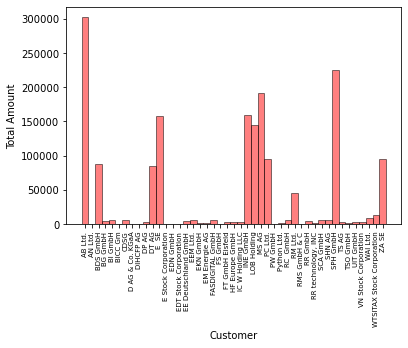

In [208]:
# Total amount receivables 

height = Aging_list['Total_amount']
height.drop(height.tail(1).index,inplace=True)
bars = Aging_list['Customer']
bars.drop(bars.tail(1).index,inplace=True)

y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,width=1,facecolor='red', edgecolor='black',alpha=0.5)


# Create names on the x-axis

plt.xticks(y_pos, bars,rotation=90)

plt.tick_params(axis='x', which='major', labelsize=7)
plt.xlabel("Customer")
plt.ylabel("Total Amount")
# Show graphic
plt.show()

In [265]:
total_amt_rec = Aging_list.style.background_gradient()
total_amt_rec

,Customer,Total_amount,Paid_within_10_Days,Paid_11-30_Days,Paid_31-60Days,Paid_61-90_Days,Paid_90Plus_Days
0,AB Ltd.,302546.250000,181527.750000,0.000000,121018.500000,0.000000,0.000000
1,AN Ltd.,651.220000,651.220000,0.000000,0.000000,0.000000,0.000000
2,BDS GmbH,88445.280000,70756.224000,17689.056000,0.000000,0.000000,0.000000
3,BG GmbH,4548.250000,4548.250000,0.000000,0.000000,0.000000,0.000000
4,BI GmbH,5554.350000,0.000000,0.000000,4554.350000,0.000000,1000.000000
5,BICC Gm,578.900000,578.900000,0.000000,0.000000,0.000000,0.000000
6,CDSG,5548.320000,0.000000,5548.320000,0.000000,0.000000,0.000000
7,D AG & Co. KGaA,558.240000,0.000000,558.240000,0.000000,0.000000,0.000000
8,DIHCFP AG,484.250000,0.000000,484.250000,0.000000,0.000000,0.000000
9,DP AG,2536.000000,0.000000,2536.000000,0.000000,0.000000,0.000000


In [104]:
paid_10days = Aging_list[Aging_list['Paid_within_10_Days']!= 0.00]


In [112]:
paid_10days = paid_10days[:-1]
paid_10days.tail()

,Customer,Total_amount,Paid_within_10_Days,Paid_11-30_Days,Paid_31-60Days,Paid_61-90_Days,Paid_90Plus_Days
30,RC GmbH,5650.00,5650.00,0.0,0.00,0.0,0.0
33,RR GmbH,4554.00,4554.00,0.0,0.00,0.0,0.0
37,SPH GmbH,224485.00,78569.75,0.0,145915.25,0.0,0.0
40,UIT GmbH,2541.78,2541.78,0.0,0.00,0.0,0.0
41,VN Stock Corporation,2584.25,2584.25,0.0,0.00,0.0,0.0


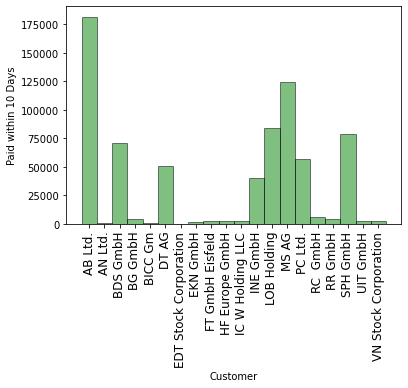

In [206]:
#paid_within_10 days

height_2 = paid_10days['Paid_within_10_Days']
bars = paid_10days['Customer']


y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height_2,width=1,facecolor='green', edgecolor='black',alpha=0.5)


# Create names on the x-axis

plt.xticks(y_pos, bars,rotation=90)

plt.tick_params(axis='x', which='major', labelsize=12)
plt.xlabel("Customer")
plt.ylabel("Paid within 10 Days")
# Show graphic
plt.show()

In [41]:
df_styled = Aging_list.style.background_gradient()

In [43]:
#dfi.export(df_styled,"mytable.png")

In [271]:
top_10_cust_receivables = Aging_list.sort_values(by=['Total_amount'],ascending=False).head(11).iloc[1:11].reset_index()


In [274]:
top_10_cust_receivables = top_10_cust_receivables.drop(['index'], axis=1)

In [276]:

top_10_cust_receivables_styled = top_10_cust_receivables.style.background_gradient()
top_10_cust_receivables_styled

,Customer,Total_amount,Paid_within_10_Days,Paid_11-30_Days,Paid_31-60Days,Paid_61-90_Days,Paid_90Plus_Days
0,AB Ltd.,302546.250000,181527.750000,0.000000,121018.500000,0.000000,0.000000
1,SPH GmbH,224485.000000,78569.750000,0.000000,145915.250000,0.000000,0.000000
2,MS AG,191463.000000,124450.950000,38292.600000,28719.450000,0.000000,0.000000
3,INE GmbH,159878.000000,39969.500000,119908.500000,0.000000,0.000000,0.000000
4,E SE,158460.580000,0.000000,0.000000,158460.580000,0.000000,0.000000
5,LOB Holding,144525.000000,83824.500000,60700.500000,0.000000,0.000000,0.000000
6,ZA SE,94896.550000,0.000000,94896.550000,0.000000,0.000000,0.000000
7,PC Ltd.,94656.950000,56794.170000,0.000000,37862.780000,0.000000,0.000000
8,BDS GmbH,88445.280000,70756.224000,17689.056000,0.000000,0.000000,0.000000
9,DT AG,84558.220000,50734.932000,33823.288000,0.000000,0.000000,0.000000


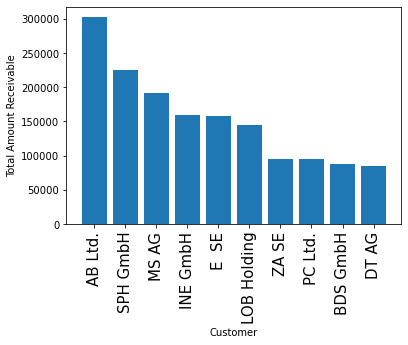

In [202]:
# Top 10 Customers on the basis of total amount receivable

height = top_10_cust_receivables['Total_amount']
bars = top_10_cust_receivables['Customer']

y_pos = np.arange(len(bars))
y_pos
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xticks(rotation=90)
plt.xlabel("Customer")
plt.ylabel("Total Amount Receivable")
# Show graphic
plt.show()

In [286]:
top_10_cust_invoice = df_cust_inv_amt.sort_values(
    by=['Invoice amount \n(incl. VAT if applicable)'],ascending=False).head(10)

In [287]:
top_10_cust_invoice

,Invoice amount \n(incl. VAT if applicable),Customer
Customer name,,
EE Deutschland GmbH,555819.67,EE Deutschland GmbH
ZA SE,320061.15,ZA SE
E SE,160904.21,E SE
BDS GmbH,157761.29,BDS GmbH
PC Ltd.,118364.09,PC Ltd.
AB Ltd.,86510.06,AB Ltd.
RC GmbH,82037.12,RC GmbH
RR GmbH,61118.99,RR GmbH
UIT GmbH,60122.56,UIT GmbH


In [289]:
top_10_cust_invoice = top_10_cust_invoice.rename(columns=
                                                 {'Invoice amount \n(incl. VAT if applicable)': 'Invoice amount'})


top_10_cust_invoice = top_10_cust_invoice.drop(['Customer'], axis=1)




In [290]:
top_10_cust_invoice_styled = top_10_cust_invoice.style.background_gradient()
top_10_cust_invoice_styled 

,Invoice amount
Customer name,
EE Deutschland GmbH,555819.670000
ZA SE,320061.150000
E SE,160904.210000
BDS GmbH,157761.290000
PC Ltd.,118364.090000
AB Ltd.,86510.060000
RC GmbH,82037.120000
RR GmbH,61118.990000
UIT GmbH,60122.560000


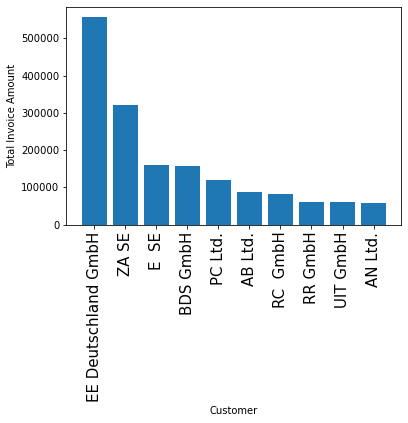

In [204]:
# Top 10 Customers on the basis of total Invoice amount

height = top_10_cust_invoice['Invoice amount']
bars = top_10_cust_invoice['Customer']

y_pos = np.arange(len(bars))
y_pos
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xticks(rotation=90)
plt.xlabel("Customer")
plt.ylabel("Total Invoice Amount")
# Show graphic
plt.show()

In [120]:
df_1.head(10)

,index,Cutomer number,Customer name,Country,Invoice number,Invoice date,Invoice amount \n(incl. VAT if applicable),Open amount\n(incl. VAT if applicable),Due date,Days overdue \nby 2021-10-31
0,0,1071535,AB Ltd.,FR,10142,2021-04-30 00:00:00.000000,5221.13,5221.13,2021-05-30 00:00:00.000000,154
1,1,1071535,AB Ltd.,FR,10146,2021-04-30 00:00:00.000000,12771.68,12771.68,2021-05-30 00:00:00.000000,154
2,2,1071535,AB Ltd.,FR,10180,2021-06-30 00:00:00.000000,17028.90,17028.90,2021-08-14 00:00:00.000000,78
3,3,1071535,AB Ltd.,FR,10007,2021-09-08 00:00:00.000000,7470.23,7470.23,2021-10-08 00:00:00.000000,23
4,4,1071535,AB Ltd.,FR,10014,2021-09-30 00:00:00.000000,3775.28,3775.28,2021-11-09 00:00:00.000000,-9
5,5,1071535,AB Ltd.,FR,202110,2021-10-19 00:00:00.000000,40242.84,40242.84,2021-10-19 00:00:00.000000,12
6,6,1063786,AN Ltd.,JP,20035,2021-08-31 00:00:00.000000,21619.33,21619.33,2021-10-30 00:00:00.000000,1
7,7,1063786,AN Ltd.,JP,20067,2021-09-30 00:00:00.000000,6545.00,6545.00,2021-11-29 00:00:00.000000,-29
8,8,1063786,AN Ltd.,JP,20085,2021-09-30 00:00:00.000000,1085.28,1085.28,2021-11-29 00:00:00.000000,-29
9,9,1063786,AN Ltd.,JP,20095,2021-09-30 00:00:00.000000,15856.75,15856.75,2021-11-29 00:00:00.000000,-29


In [167]:
ratio_invoice_due_cust = df_1.groupby(by=["Customer name"]).sum().reset_index()
ratio_invoice_due_cust = ratio_invoice_due_cust[ratio_invoice_due_cust['Days overdue \nby 2021-10-31']>0]

ratio_invoice_due_cust['Invoice amount/Days Overdue'] = ratio_invoice_due_cust['Invoice amount \n(incl. VAT if applicable)']/ratio_invoice_due_cust['Days overdue \nby 2021-10-31']


In [294]:
ratio_invoice_due_cust.head()

,Customer name,index,Cutomer number,Invoice number,Invoice amount \n(incl. VAT if applicable),Open amount\n(incl. VAT if applicable),Days overdue \nby 2021-10-31,Invoice amount/Days Overdue
0,AB Ltd.,15,6429210,252599,86510.06,86510.06,412,209.975874
10,DT AG,25,1046998,20093,1998.31,1998.31,1,1998.310000
15,EE Deutschland GmbH,220,5329275,100882,555819.67,535455.42,38,14626.833421
18,EM Energie AG,52,1071201,20368,10709.70,9317.43,162,66.109259
21,IC W Holding LLC,55,2047052,10011,675.00,675.00,1,675.000000


In [299]:
ratio_invoice_due_cust_styled = ratio_invoice_due_cust[['Customer name','Invoice amount/Days Overdue']]


In [300]:
ratio_invoice_due_cust_styled = ratio_invoice_due_cust_styled.style.background_gradient()

In [301]:
ratio_invoice_due_cust_styled

,Customer name,Invoice amount/Days Overdue
0,AB Ltd.,209.975874
10,DT AG,1998.310000
15,EE Deutschland GmbH,14626.833421
18,EM Energie AG,66.109259
21,IC W Holding LLC,675.000000
22,INE GmbH,1190.000000
23,MS AG,61.833684
24,PC Ltd.,23672.818000
25,PW GmbH,250.277778
27,RM Ltd.,371.880000


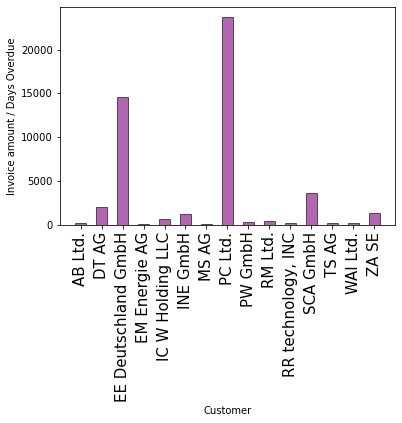

In [229]:
# Ratio of Invoice amount and Total Days Overdue  - The more the better 

height_4 = ratio_invoice_due_cust['Invoice amount/Days Overdue']
bars = ratio_invoice_due_cust['Customer name']


y_pos = np.arange(len(bars))

# Create bars
#plt.bar(y_pos, height_2,width=0.5,facecolor='red', edgecolor='black',alpha=0.8)
plt.bar(y_pos,height_4,width=0.5,facecolor='purple', edgecolor='black',alpha=0.6)

# Create names on the x-axis

plt.xticks(y_pos, bars,rotation=90)

plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Customer")
plt.ylabel("Invoice amount / Days Overdue")
# Show graphic
plt.show()

In [233]:
test = df_1.groupby(by=["Customer name"]).mean().reset_index()
test = test.rename(columns={'Days overdue \nby 2021-10-31': 'Days Overdue per Invoice'})


In [217]:
xyz = ratio_invoice_due_cust[['Customer name','Days overdue \nby 2021-10-31']].reset_index()
xyz = xyz.drop(['index'], axis=1)
xyz

,Customer name,Days overdue \nby 2021-10-31
0,AB Ltd.,412
1,DT AG,1
2,EE Deutschland GmbH,38
3,EM Energie AG,162
4,IC W Holding LLC,1
5,INE GmbH,1
6,MS AG,19
7,PC Ltd.,5
8,PW GmbH,63
9,RM Ltd.,1


In [234]:
test = test[['Customer name','Days Overdue per Invoice']]
test['Total Invoice Amount'] = ratio_invoice_due_cust['Invoice amount \n(incl. VAT if applicable)']
test

,Customer name,Days Overdue per Invoice,Total Invoice Amount
0,AB Ltd.,68.666667,86510.06
1,AN Ltd.,-23.000000,NaN
2,BDS GmbH,-29.000000,NaN
3,BG GmbH,-14.000000,NaN
4,BI GmbH,-29.000000,NaN
5,BICC Gm,-2.333333,NaN
6,CDSG,-29.000000,NaN
7,D AG & Co. KGaA,-29.000000,NaN
8,DIHCFP AG,-29.000000,NaN
9,DP AG,-12.333333,NaN


In [231]:
test_2 = test[test['Days Overdue per Invoice'] > 0.00]
test_2 = test_2.sort_values(by=['Days Overdue per Invoice'],ascending=False).reset_index()
test_2=test_2.drop(['index'], axis=1)
test_2


,Customer name,Days Overdue per Invoice,Total Invoice Amount
0,EM Energie AG,162.000000,10709.70
1,WAI Ltd.,123.000000,23800.00
2,"RR technology, INC",93.000000,19629.43
3,AB Ltd.,68.666667,86510.06
4,PW GmbH,63.000000,15767.50
5,TS AG,63.000000,8925.00
6,ZA SE,40.666667,320061.15
7,MS AG,19.000000,1174.84
8,EE Deutschland GmbH,7.600000,555819.67
9,PC Ltd.,1.666667,118364.09


In [302]:
days_due_per_invoice_styled = test_2.style.background_gradient()
days_due_per_invoice_styled

,Customer name,Days Overdue per Invoice,Total Invoice Amount
0,EM Energie AG,162.000000,10709.700000
1,WAI Ltd.,123.000000,23800.000000
2,"RR technology, INC",93.000000,19629.430000
3,AB Ltd.,68.666667,86510.060000
4,PW GmbH,63.000000,15767.500000
5,TS AG,63.000000,8925.000000
6,ZA SE,40.666667,320061.150000
7,MS AG,19.000000,1174.840000
8,EE Deutschland GmbH,7.600000,555819.670000
9,PC Ltd.,1.666667,118364.090000


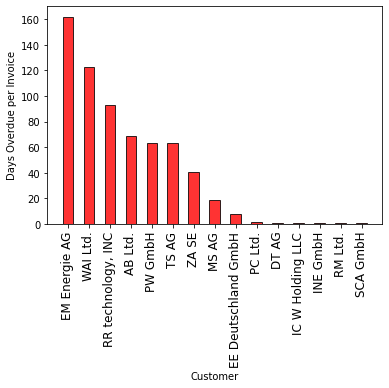

In [305]:
# Days Overdue per Invoice  the less the better 

height_2 = test_2['Days Overdue per Invoice']
height_3 = test_2['Total Invoice Amount']
bars = test_2['Customer name']


y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height_2,width=0.5,facecolor='red', edgecolor='black',alpha=0.8)
#plt.bar(y_pos,height_3,width=0.5,facecolor='yellow', edgecolor='black',alpha=0.6)

# Create names on the x-axis

plt.xticks(y_pos, bars,rotation=90)

plt.tick_params(axis='x', which='major', labelsize=12)
plt.xlabel("Customer")
plt.ylabel("Days Overdue per Invoice")
# Show graphic
plt.show()

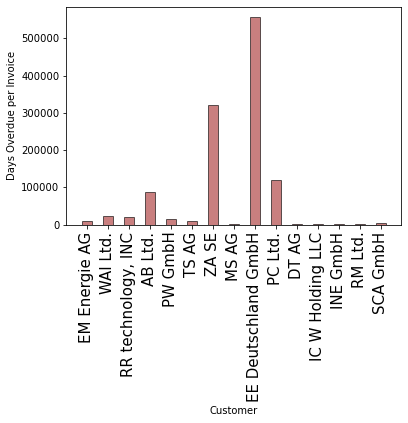

In [222]:
# Total Amount for the same companies as above the more the better the less the worse

height_3 = test_2['Total Invoice Amount']
bars = test_2['Customer name']


y_pos = np.arange(len(bars))

# Create bars
#plt.bar(y_pos, height_2,width=0.5,facecolor='red', edgecolor='black',alpha=0.8)
plt.bar(y_pos,height_3,width=0.5,facecolor='brown', edgecolor='black',alpha=0.6)

# Create names on the x-axis

plt.xticks(y_pos, bars,rotation=90)

plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Customer")
plt.ylabel("Days Overdue per Invoice")
# Show graphic
plt.show()

In [223]:
df_2.head()

,index,Customer__No.,Country,Customer,Revenues_(net_w/o_VAT),"Discount_(0,05%)",Paid_within_10_Days,Paid_11-30_Days,Paid_31-60Days,Paid_61-90_Days,Paid_90Plus_Days,Total_amount
0,0,1065842,GB,EDT Stock Corporation,223.698492,1.118492,222.58,0.00,0.0,0.0,0.0,222.58
1,1,1067085,DE,DIHCFP AG,484.250000,0.000000,0.00,484.25,0.0,0.0,0.0,484.25
2,2,1065758,DE,RMS GmbH & C,543.500000,0.000000,0.00,543.50,0.0,0.0,0.0,543.50
3,3,1028331,CN,E Stock Corporation,544.980000,0.000000,0.00,544.98,0.0,0.0,0.0,544.98
4,4,1050019,DE,FS GmbH,548.640000,0.000000,0.00,548.64,0.0,0.0,0.0,548.64


In [224]:
Revenue_country = df_2.groupby(by=["Country"]).sum()
Revenue_country = Revenue_country.sort_values(by=['Revenues_(net_w/o_VAT)'],ascending=False).reset_index()
Revenue_country = Revenue_country.drop(['index'], axis=1)

In [313]:
Revenue_country = Revenue_country[['Country','Revenues_(net_w/o_VAT)']]
Revenue_country.rename(columns={"Revenues_(net_w/o_VAT)": "Revenues"})
Revenue_country

,Country,Revenues_(net_w/o_VAT)
0,DE,806862.129769
1,FR,303458.449749
2,AT,166546.893719
3,CN,154104.273970
4,US,106031.536241
5,SZ,94942.347839
6,GB,51626.018492
7,NL,7011.759045
8,AU,5855.900000
9,IN,1260.623116


In [314]:
Revenue_country_styled = Revenue_country.rename(columns={"Revenues_(net_w/o_VAT)": "Revenues"}).style.background_gradient()
Revenue_country_styled

,Country,Revenues
0,DE,806862.129769
1,FR,303458.449749
2,AT,166546.893719
3,CN,154104.273970
4,US,106031.536241
5,SZ,94942.347839
6,GB,51626.018492
7,NL,7011.759045
8,AU,5855.900000
9,IN,1260.623116


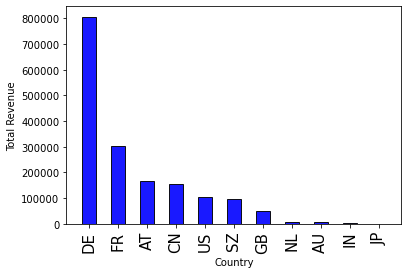

In [315]:
#Revenue Country Wise 

height_5 = Revenue_country['Revenues_(net_w/o_VAT)']
bars = Revenue_country['Country']


y_pos = np.arange(len(bars))

plt.bar(y_pos,height_5,width=0.5,facecolor='blue', edgecolor='black',alpha=0.9)

# Create names on the x-axis

plt.xticks(y_pos, bars,rotation=90)

plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("Country")
plt.ylabel("Total Revenue")
# Show graphic
plt.show()

In [316]:
df_1[df_1['Country']=="CN"]

,index,Cutomer number,Customer name,Country,Invoice number,Invoice date,Invoice amount \n(incl. VAT if applicable),Open amount\n(incl. VAT if applicable),Due date,Days overdue \nby 2021-10-31
33,33,1028331,E Stock Corporation,CN,20038,2021-08-31 00:00:00.000000,9203.91,9203.91,2021-10-30 00:00:00.000000,1
34,34,1028331,E Stock Corporation,CN,20099,2021-09-30 00:00:00.000000,2900.63,2900.63,2021-11-29 00:00:00.000000,-29
90,90,5000004,WAI Ltd.,CN,60033,2021-06-30 00:00:00.000000,23800.00,23800.00,2021-06-30 00:00:00.000000,123


In [317]:
# Mean of Days overdue by Country and avg amount per transaction 

test_3 = df_1.groupby(by=["Country"]).mean().reset_index()
#test = test.rename(columns={'Days overdue \nby 2021-10-31': 'Days Overdue per Invoice'})
test_3 

,Country,index,Cutomer number,Invoice number,Invoice amount \n(incl. VAT if applicable),Open amount\n(incl. VAT if applicable),Days overdue \nby 2021-10-31
0,AT,61.200000,1.066245e+06,20160.800000,19798.924000,19743.886000,3.800000
1,AU,48.000000,1.069987e+06,20074.000000,3190.690000,3190.690000,-19.000000
2,CN,52.333333,2.352222e+06,33390.000000,11968.180000,11968.180000,31.666667
3,DE,56.521739,1.108635e+06,21436.391304,32103.198696,31268.517391,-1.543478
4,FR,2.500000,1.071535e+06,42099.833333,14418.343333,14418.343333,68.666667
5,GB,39.250000,1.067078e+06,20070.125000,7395.153750,7249.638750,-15.500000
6,IN,50.500000,1.065812e+06,20067.500000,25430.675000,25430.675000,-14.000000
7,JP,8.000000,1.063786e+06,20078.000000,11401.272000,11401.272000,-23.000000
8,NL,15.500000,1.067512e+06,17558.750000,10808.315000,10808.315000,-9.000000
9,SZ,59.000000,1.071623e+06,20058.000000,39454.696667,39454.696667,1.666667


In [319]:
avg_due_country_amt_styled = test_3[['Country','Invoice amount \n(incl. VAT if applicable)','Days overdue \nby 2021-10-31']]
avg_due_country_amt_styled

,Country,Invoice amount \n(incl. VAT if applicable),Days overdue \nby 2021-10-31
0,AT,19798.924000,3.800000
1,AU,3190.690000,-19.000000
2,CN,11968.180000,31.666667
3,DE,32103.198696,-1.543478
4,FR,14418.343333,68.666667
5,GB,7395.153750,-15.500000
6,IN,25430.675000,-14.000000
7,JP,11401.272000,-23.000000
8,NL,10808.315000,-9.000000
9,SZ,39454.696667,1.666667


In [320]:
avg_due_country_amt_styled = avg_due_country_amt_styled.rename(columns={"Invoice amount \n(incl. VAT if applicable)": "Avg Invoice Ammount"})

In [321]:
avg_due_country_amt_styled = avg_due_country_amt_styled.rename(columns={"Days overdue \nby 2021-10-31": "Avg Days Overdue"})

In [322]:
avg_due_country_amt_styled = avg_due_country_amt_styled.style.background_gradient()
avg_due_country_amt_styled

,Country,Avg Invoice Ammount,Avg Days Overdue
0,AT,19798.924000,3.800000
1,AU,3190.690000,-19.000000
2,CN,11968.180000,31.666667
3,DE,32103.198696,-1.543478
4,FR,14418.343333,68.666667
5,GB,7395.153750,-15.500000
6,IN,25430.675000,-14.000000
7,JP,11401.272000,-23.000000
8,NL,10808.315000,-9.000000
9,SZ,39454.696667,1.666667


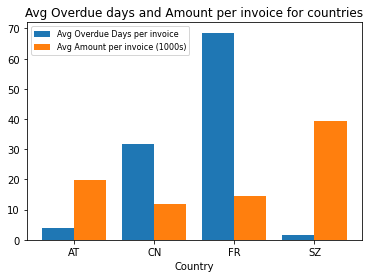

In [262]:
X = ['AT', 'CN', 'FR', 'SZ']
Days = [3.8, 31.6, 68.6, 1.6]
Amount = [19.7, 11.9, 14.4, 39.4]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Days, 0.4, label = 'Avg Overdue Days per invoice')
plt.bar(X_axis + 0.2, Amount, 0.4, label = 'Avg Amount per invoice (1000s)')
  
plt.xticks(X_axis, X)
plt.xlabel("Country")
#plt.ylabel("Number of Students")
plt.title("Avg Overdue days and Amount per invoice for countries")
plt.legend(loc = "upper left",prop={'size': 8})
plt.show()

In [323]:
df_1

,index,Cutomer number,Customer name,Country,Invoice number,Invoice date,Invoice amount \n(incl. VAT if applicable),Open amount\n(incl. VAT if applicable),Due date,Days overdue \nby 2021-10-31
0,0,1071535,AB Ltd.,FR,10142,2021-04-30 00:00:00.000000,5221.13,5221.13,2021-05-30 00:00:00.000000,154
1,1,1071535,AB Ltd.,FR,10146,2021-04-30 00:00:00.000000,12771.68,12771.68,2021-05-30 00:00:00.000000,154
2,2,1071535,AB Ltd.,FR,10180,2021-06-30 00:00:00.000000,17028.90,17028.90,2021-08-14 00:00:00.000000,78
3,3,1071535,AB Ltd.,FR,10007,2021-09-08 00:00:00.000000,7470.23,7470.23,2021-10-08 00:00:00.000000,23
4,4,1071535,AB Ltd.,FR,10014,2021-09-30 00:00:00.000000,3775.28,3775.28,2021-11-09 00:00:00.000000,-9
...,...,...,...,...,...,...,...,...,...,...
92,92,1066009,ZA SE,DE,20577,2021-06-30 00:00:00.000000,13291.28,13291.28,2021-08-29 00:00:00.000000,63
93,93,1066009,ZA SE,DE,20578,2021-06-30 00:00:00.000000,177310.00,177310.00,2021-08-29 00:00:00.000000,63
94,94,1066009,ZA SE,DE,20000,2021-07-20 00:00:00.000000,6220.50,6220.50,2021-09-18 00:00:00.000000,43
95,95,1066009,ZA SE,DE,20001,2021-07-22 00:00:00.000000,59046.31,59046.31,2021-09-20 00:00:00.000000,41
